In [ ]:
#memasukan beberapa library yang akan digunakan
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#membuka dataset untuk ditampilkan
df=pd.read_csv('Data TA2.csv',delimiter=';') #memasukan dataset csv
train=df.dropna()
#menentukan jumlah data yang ditampilkan
df.head(100)

,label,HI1,HI3,HI5,HI7,HI9,HI11
0,Kipas,98.46,2.85,1.67,3.19,2.27,2.26
1,Kipas,98.75,6.50,1.33,3.66,2.22,0.82
2,Kipas,99.16,6.10,2.99,4.37,0.81,3.20
3,Kipas,99.20,4.85,3.84,3.14,1.83,1.92
4,Kipas,99.44,4.34,1.54,4.34,2.50,0.72
...,...,...,...,...,...,...,...
95,Kosong,0.00,0.00,0.00,0.00,0.00,0.00
96,Kosong,0.00,0.00,0.00,0.00,0.00,0.00
97,Pemanas Air,0.00,0.00,0.00,0.00,0.00,0.00
98,Pemanas Air,99.88,4.06,1.55,1.19,1.21,0.63


In [ ]:
#memasukan library untuk melatih data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
LE=LabelEncoder()

#menentukan fitur fitur yang digunakan
train['label'].to_numpy()
x=train[['HI3','HI5','HI7','HI9','HI11']]
y=LE.fit(train['label'].to_numpy())
y=y.transform(train['label'].to_numpy())
#menentukan jumlah data test dan data training 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#memasukan library dan model SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()
#menentukan nilai parameter yang mempengaruhi
parameters = {
	    'kernel': ['rbf'],
	    'C':     [1, 10, 100],
	    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.5, 0.05, 0.005],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#menanmpilkan rekomendasi parameter
print(grid_search.best_params_)


{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVC

#memasukan parameter yang digunakan sesuai dengan karnel yang dipakai
rbf=SVC(C=10,gamma=0.5,kernel='rbf')
poly=SVC(C=10,kernel='poly')
lin=SVC(C=10,kernel='linear')

rbf.fit(xtrain,ytrain)
poly.fit(xtrain,ytrain)
lin.fit(xtrain,ytrain)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
ypred_rbf=rbf.predict(xtest)
ypred_poly=poly.predict(xtest)
ypred_lin=lin.predict(xtest)

In [ ]:
#memanggil library untuk menampilkan akurasi
from sklearn.metrics import accuracy_score

accuracy_score(ytest, ypred_rbf),accuracy_score(ytest, ypred_poly),accuracy_score(ytest, ypred_lin)

(0.8636363636363636, 0.8125, 0.7897727272727273)

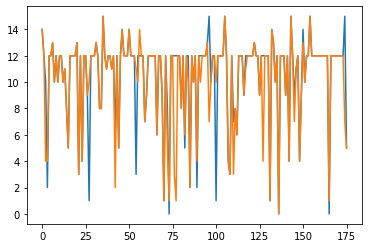

In [ ]:
plt.plot(ypred_rbf)
plt.plot(ytest)
plt.show()


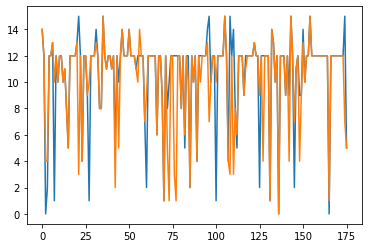

In [ ]:
plt.plot( ypred_poly)
plt.plot(ytest)
plt.show()


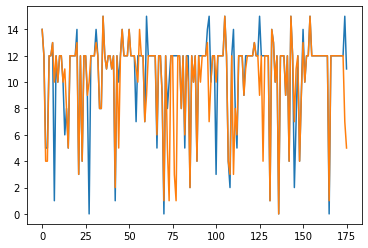

In [ ]:
plt.plot( ypred_lin)
plt.plot(ytest)
plt.show()


              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.50      0.40      0.44         5
           2       0.33      0.50      0.40         2
           3       0.67      0.50      0.57         4
           4       1.00      0.50      0.67         8
           5       0.75      0.75      0.75         4
           6       0.67      0.67      0.67         3
           7       0.50      0.25      0.33         4
           8       0.83      1.00      0.91         5
           9       0.88      1.00      0.93         7
          10       0.88      0.58      0.70        12
          11       1.00      0.67      0.80         6
          12       0.93      1.00      0.96        99
          13       1.00      0.86      0.92         7
          14       0.80      0.80      0.80         5
          15       0.67      1.00      0.80         4

    accuracy                           0.86       176
   macro avg       0.73   

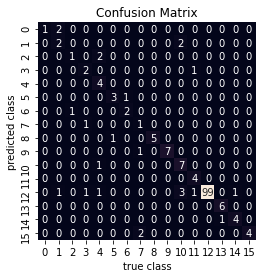

In [ ]:
#memanggil library untuk menampilkan nilai dari Recall F1 score dan precision
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
mat = confusion_matrix(ytest, ypred_rbf)
sns.heatmap(mat.T, square=True , annot=True, fmt='d', cbar=False)
#menampilkan nama tabel
plt.title('Confusion Matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')
print(classification_report(ytest, ypred_rbf))

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import recall_score
# mat = confusion_matrix(ytest, ypred_poly)
# sns.heatmap(mat.T, square=True , annot=True, fmt='d', cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('true class')
# plt.ylabel('predicted class')
# print(classification_report(ytest, ypred_poly))

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import recall_score
# mat = confusion_matrix(ytest, ypred_lin)
# sns.heatmap(mat.T, square=True , annot=True, fmt='d', cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('true class')
# plt.ylabel('predicted class')
# print(classification_report(ytest, ypred_lin))

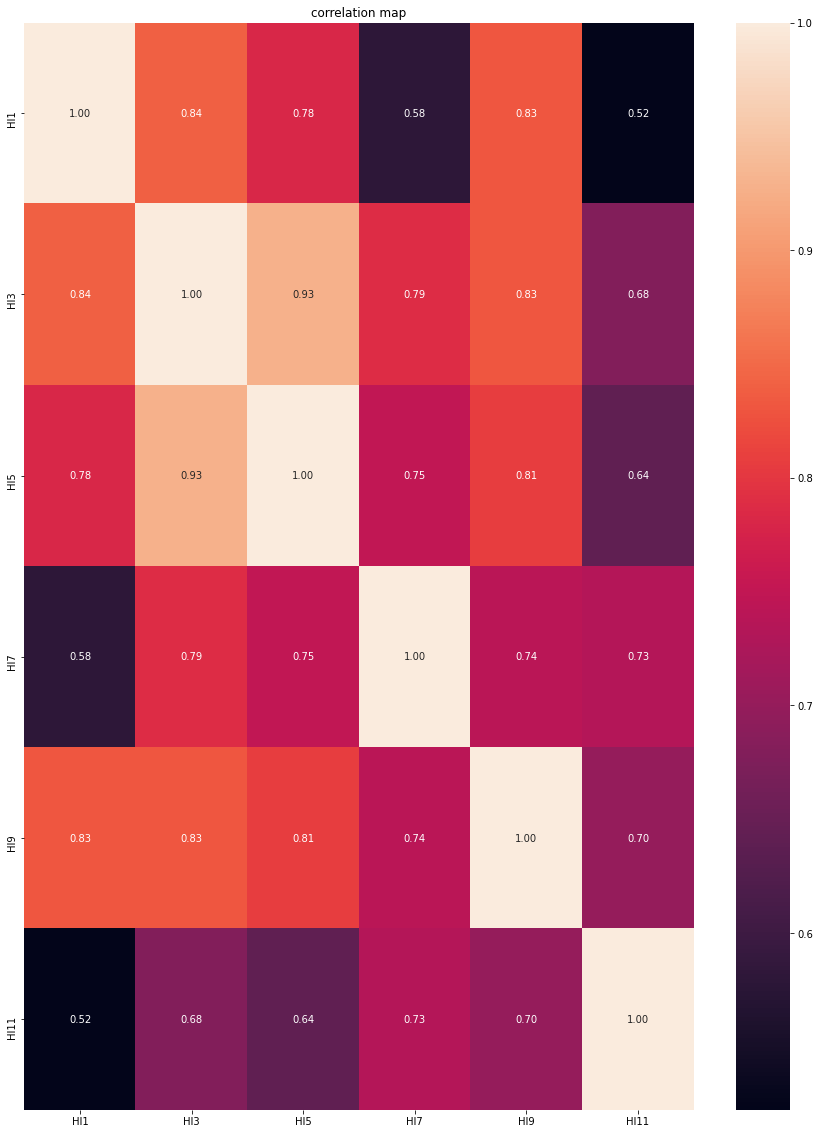

In [ ]:
#memanggil library yang akan digunakan untuk menampilkan grafik korelasi
from pylab import rcParams
%matplotlib inline
from matplotlib import rcParams
from matplotlib.cm import rainbow


def plot_correlation(df):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(df.corr(), annot=True, fmt=".2f")
    plt.title('correlation map')
    plt.show()
    fig.savefig('corr.png')

plot_correlation(df)

In [ ]:

#mencoba hasil identifikasi apakah hasil yang akan ditampilkan sesuai dengan nilai dari data set
test=[[	2.85,	1.67,	3.19,	2.27,	2.26]]
pred_rbf = rbf.predict(test)
print('Hasil prediksi:', LE.inverse_transform(pred_rbf)) 

test1=[[	6.50,	1.33,	3.66,	2.22,	0.82]]
pred_rbf = rbf.predict(test1)
print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

test2=[[4.06,	1.55,	1.19,	1.21,	0.63]]
pred_rbf = rbf.predict(test2)
print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

test3=[[4.27,	2.09,	1.09,	1.23,	0.57]]
pred_rbf = rbf.predict(test3)
print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

test4=[[4.2,	2.06,	0.93,	1.26,	0.64]]
pred_rbf = rbf.predict(test4)
print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test5=[[4.06,	1.95,	1.2,	1.29,	0.44]]
# pred_rbf = rbf.predict(test5)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test6=[[4.13,	1.94,	1.18,	1.27,	0.62]]
# pred_rbf = rbf.predict(test6)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test7=[[4.1,	1.85,	1.23,	1.33,	0.53]]
# pred_rbf = rbf.predict(test7)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test8=[[4.09,	1.86,	1.01,	1.35,	0.46]]
# pred_rbf = rbf.predict(test8)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test9=[[4.11,	1.98,	1.09,	1.35,	0.46]]
# pred_rbf = rbf.predict(test9)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test10=[[4.14,	2,	1.08,	1.14,	0.51]]
# pred_rbf = rbf.predict(test10)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test11=[[3.93,	1.96,	0.98,	1.06,	0.4]]
# pred_rbf = rbf.predict(test11)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test12=[[4.23,	2.01,	1.15,	1.04	,0.5]]
# pred_rbf = rbf.predict(test12)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test13=[[4.06,	2.09,	1.17,	1.24,	0.73]]
# pred_rbf = rbf.predict(test13)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test14=[[4.21,	2.02,	1.23,	1.29,	0.66]]
# pred_rbf = rbf.predict(test14)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test15=[[4.51,	1.7	,1.07,	1.19,	0.63]]
# pred_rbf = rbf.predict(test15)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test16=[[4.5,	1.76,	1.01,	1.25,	0.54]]
# pred_rbf = rbf.predict(test16)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test17=[[4.37,	1.85,	1.19,	1.04,	0.48]]
# pred_rbf = rbf.predict(test17)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test18=[[4.59,	1.54,	1.33,	1.16,	0.59]]
# pred_rbf = rbf.predict(test18)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))

# test19=[[4.4,	1.64,	1.05,	0.83,	0.84]]
# pred_rbf = rbf.predict(test19)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))
# #hairdyer

# test20=[[5.25,	2.47,	1.74,	1.14,	0.83]]
# pred_rbf = rbf.predict(test20)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))
# #HairdryerBlenderKipas

# test21=[[4.91,	2.39,	1.66,	1.18,	0.46]]
# pred_rbf = rbf.predict(test21)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))
# #HairdryerPemanas Ai

# test22=[[5.01	,2.37	,1.79,	1.12,	0.6]]
# pred_rbf = rbf.predict(test22)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))
# #HairdryerPemanas Ai

# test23=[[5.47,	2.76,	1.69,	1.05,	0.75]]
# pred_rbf = rbf.predict(test23)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))
# #HairdryerPemanas Ai

# test24=[[5.26,	2.99,	1.67,	1.64,	0.6]]
# pred_rbf = rbf.predict(test24)
# print('Hasil prediksi:', LE.inverse_transform(pred_rbf))
# #HairdryerPemanas Ai



Hasil prediksi: ['Kipas']
Hasil prediksi: ['Kipas']
Hasil prediksi: ['Pemanas Air']
Hasil prediksi: ['KipasPemanas AirBlenderHairdryer']
Hasil prediksi: ['Pemanas AirKipasHairdryer']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

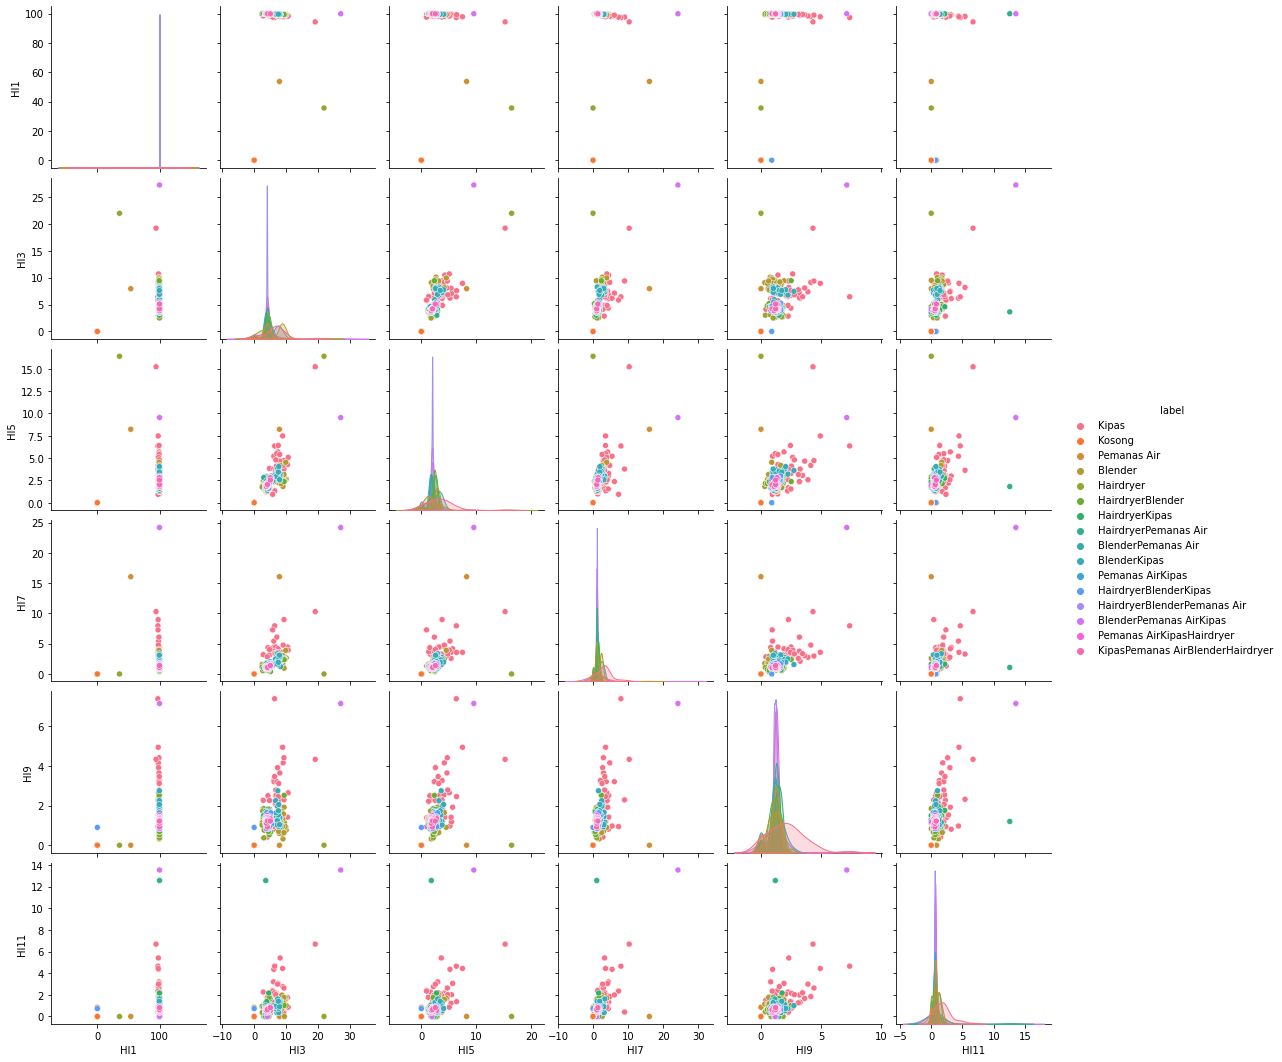

In [ ]:
#menampilkan plotingan selurug dataset yang digunakan
sns.pairplot(df, hue="label")

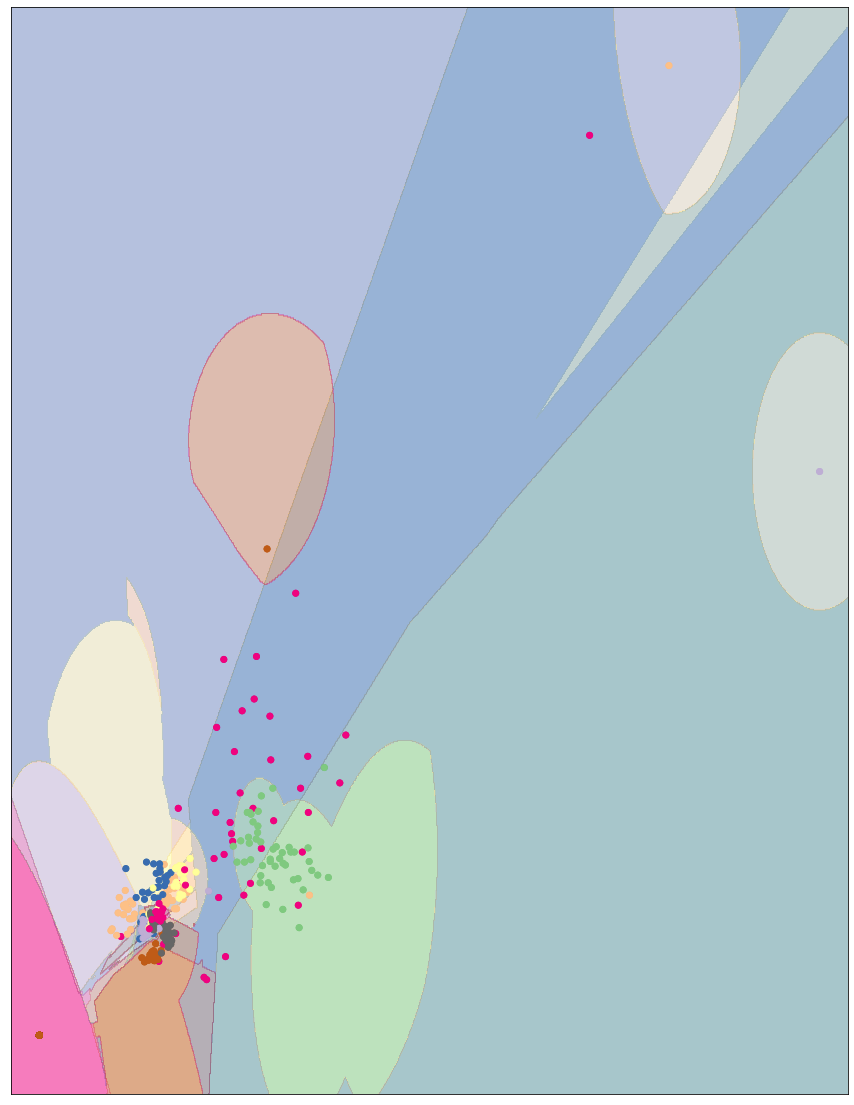

In [ ]:
#Mencoba menampilkan daerah persebaran setiap label dan daerah yang dicakup
#mengambi 2 fitur yang akan digunakan
X_ = train[['HI3', 'HI5']].to_numpy()
y_ = LE.fit(train['label'].to_numpy())
y_=y_.transform(train['label'].to_numpy())

#menentukan parameter nilai c dan gamma yang digunakan
svc = SVC(kernel='linear', C=100).fit(X_,y_)
rbf_svc = SVC(kernel='rbf', C=100, gamma=.05).fit(X_,y_)

x_min, x_max = X_[:,0].min()-1, X_[:,0].max()+1
y_min, y_max = X_[:,1].min()-1, X_[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

for i, clf in enumerate ((svc, rbf_svc)):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.3) 

  plt.scatter(X_[:,0], X_[:,1], c=y_ , cmap=plt.cm.Accent)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
plt.show()

In [ ]:
#memanggil library untuk menyimpan model yang terbentuk
from sklearn.externals import joblib
#menyimpan model
joblib.dump(SVC, 'ModelSVM.pkl')

['ModelSVM.pkl']

In [ ]:
#memanggil model yang sudah tersimpan
hh=joblib.load('ModelSVM.pkl')

NameError: ignored

In [ ]:
#mencoba menguji kemampuan identifikasi dari model yang tersimpan
test88=[[	2.85,	1.67,	3.19,	2.27,	2.26]]
pred_rbf = rbf.predict(test88)
print('Hasil prediksi:', LE.inverse_transform(pred_rbf)) 

Hasil prediksi: ['Kipas']
